In [1]:
# Multiple Regression:

# y = mx + b

# y = m1x1 + m2x2 + ..... + mnxn + b

In [41]:
from sklearn.datasets import make_regression

In [42]:
x, y = make_regression(n_samples = 100, n_features = 2, n_informative = 2, n_targets = 1, noise = 50)  

In [43]:
x

array([[-0.16593622,  0.4169073 ],
       [ 0.15468515,  1.47555237],
       [ 1.16285982,  0.64050324],
       [ 0.05736216, -0.92322307],
       [-0.04930017,  0.10216916],
       [-0.09826402, -2.41845826],
       [ 0.01602554, -0.38421948],
       [-1.97966006, -0.54887054],
       [-0.39673196, -0.05243217],
       [ 1.77074463,  1.84965821],
       [ 1.40045546, -0.43795432],
       [ 0.00756699, -2.63316954],
       [ 1.17375426, -1.53586654],
       [ 1.20292796, -0.92764328],
       [-1.82275054, -0.39856172],
       [-1.2537692 , -0.56569906],
       [-0.85375015,  0.18286606],
       [-1.42166409,  1.20860856],
       [-0.7913697 , -0.18071251],
       [ 0.70538237,  0.01378689],
       [ 2.42420907, -0.98256264],
       [ 0.13216331, -1.11705364],
       [ 0.63922532, -1.02030319],
       [ 1.14776042, -1.32059416],
       [-0.32594114, -0.26516215],
       [-0.39224749, -0.30670537],
       [ 0.03400453, -0.07789953],
       [-0.91154652, -0.7894955 ],
       [-0.26961993,

In [44]:
y

array([ 2.05606501e+01,  6.88074466e+01,  1.02979180e+02, -8.14142594e+00,
       -7.31078798e+01, -9.60058802e+01,  1.17541632e+01,  2.52361509e+01,
        1.56769266e-01,  2.49713143e+01, -6.37501982e+01, -4.43848772e+01,
        1.16826961e+00,  3.24169217e+01, -6.00153117e+01, -1.78505598e+01,
        1.40734836e+01,  1.01518583e+02, -2.93733801e+01, -4.56219793e+01,
       -3.22723218e+01, -4.43873161e+01, -9.53607634e+01, -1.22661388e+02,
        8.09651301e-02, -9.22750085e+01,  3.71512556e+01, -9.08650650e+01,
       -6.77039434e+00, -6.83668558e+01,  3.04871104e+01, -4.82775792e+01,
       -4.36847171e+01, -8.76339178e+01, -1.56727654e+00,  1.69447588e+01,
       -1.02949517e+02, -4.15525842e+01, -3.41709070e+01, -5.52102995e+01,
        9.99367813e+00, -6.82756352e+01, -2.79976376e+01,  6.80715229e+00,
        1.32580420e+01,  6.68556502e+01,  2.36481779e+01, -1.42261146e+01,
       -3.82672097e+01, -6.01199706e+01, -6.66133941e+01,  4.92008992e+01,
        1.40734538e+01, -

In [45]:
import pandas as pd

In [46]:
data = pd.DataFrame({
    "feature1" : x[:, 0],
    "feature2" : x[:, 1],
    "target" : y
})

In [47]:
data.shape

(100, 3)

In [48]:
data.head()

,feature1,feature2,target
0,-0.165936,0.416907,20.560650
1,0.154685,1.475552,68.807447
2,1.162860,0.640503,102.979180
3,0.057362,-0.923223,-8.141426
4,-0.049300,0.102169,-73.107880


In [49]:
!pip install plotly


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected = True)

In [51]:
import plotly.express as ex

In [53]:
fig = ex.scatter_3d(data, x = "feature1", y = "feature2", z = "target")

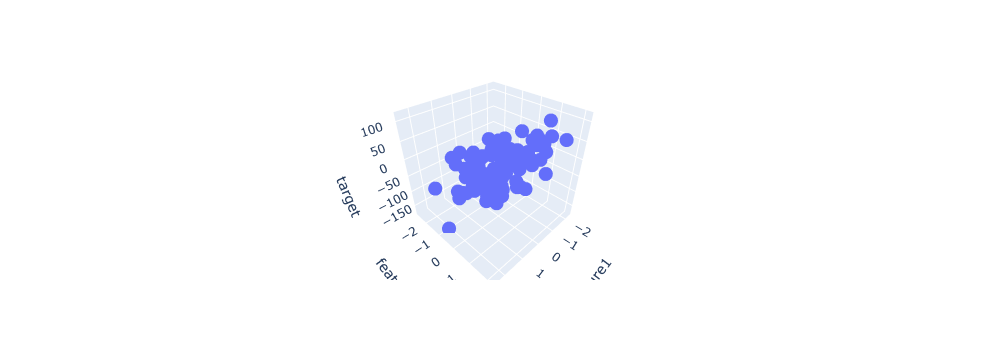

In [55]:
fig.show()

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [59]:
x_train.shape

(80, 2)

In [60]:
x_test.shape

(20, 2)

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
obj = LinearRegression()

In [63]:
obj.fit(x_train, y_train)

LinearRegression()

In [64]:
m = obj.coef_

In [65]:
m

array([-2.73509041, 34.75508952])

In [66]:
b = obj.intercept_

In [67]:
b

-15.28412413942154

In [68]:
# y = m1x1 + m2x2 + b

In [70]:
y = -2.73509041 * (-0.16593622) + 34.75508952 * 0.4169073 + (-15.28412413942154)

-0.34062304238639385

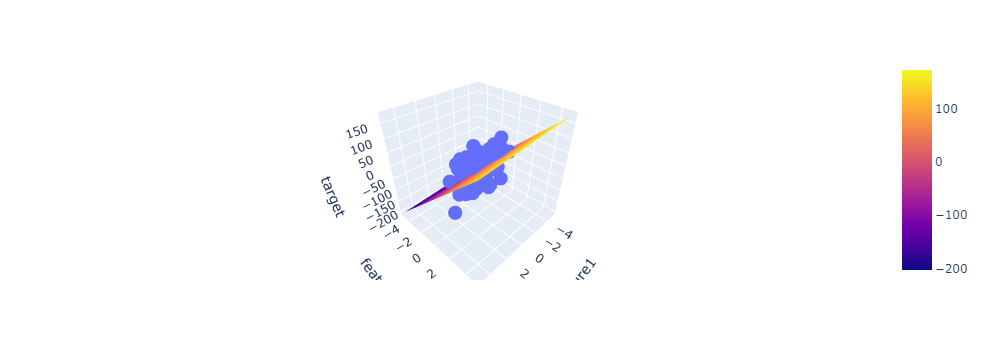

In [74]:
import plotly.graph_objects as go


import numpy as np

x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)

xGrid, yGrid = np.meshgrid(y, x)
final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = obj.predict(final).reshape(10,10)

z = z_final

fig = ex.scatter_3d(data, x='feature1', y='feature2', z='target')

fig.add_trace(go.Surface(x = x, y = y, z =z ))

fig.show()